# Smart news classification

The best one for vietnamese news categorizer

- base model: bow/tfidf, so simple but useful
- embedding dbow 100D
- topic lda: 10D, 12D
- lsi 24D

I love to select:

- LR: fast, no need to scale
- SVM: high dim, robust
- NB, GBC for more

In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [70]:
dbow = Doc2Vec.load("/home/laampt/nlp/xnews/m1/crazy_dbow_5ns_100features_2mw_r20_stok")

In [3]:
print dbow

Doc2Vec(dbow+w,d100,n5,hs,w8,mc2,s1e-05,t8)


In [4]:
print len(dbow.vocab.keys())

1072070


In [5]:
print '='*79
print '{:79s}'.format("EVALUATION MODEL")
print '='*79

print u"1. Cha và Mẹ: {:.2f}\n".format(dbow.similarity(u'cha', u'mẹ'))

print u"2. Cá và Nước: {:.2f}\n".format(dbow.similarity(u'cá', u'nước'))

print u"2. Chồng và Vợ: {:.2f}\n".format(dbow.similarity(u'chồng', u'vợ'))

print u"3. Not the same: Xe Tàu Người is: {}\n".format(dbow.doesnt_match(u"xe tàu người".split()))

print u"4. Most sim of Giàu"
for w, v in dbow.most_similar(positive=[u'giàu'], topn=5):
    print w, v

print

print u"5. Vector Hà_Nội - Việt_Nam + Bắc_Kinh"
for w, v in dbow.most_similar(positive=[u'hà_nội', u'bắc_kinh'], negative=[u'việt_nam']):
    print w, v

print 

print u"6. Most sim of Dân_Tộc"
for w, v in dbow.most_similar(positive=[u'dân_tộc'], topn=5):
    print w, v

print

print "Cộng_Hòa Xã_Hội Việt_Nam + Độc_Lập Tự_Do Hạnh_Phúc: {}".format(dbow.n_similarity(u"cộng_hòa xã_hội việt_nam".split(), u"độc_lập tự_do hạnh_phúc".split()))

EVALUATION MODEL                                                               
1. Cha và Mẹ: 0.72

2. Cá và Nước: 0.67

2. Chồng và Vợ: 0.69

3. Not the same: Xe Tàu Người is: tàu

4. Most sim of Giàu
tỷ_phú 0.845852255821
forbes 0.778218626976
tài_sản 0.770399153233
ông_chủ 0.764055550098
tỉ_phú 0.762084126472

5. Vector Hà_Nội - Việt_Nam + Bắc_Kinh
thượng_hải 0.671923875809
quảng_châu 0.615896761417
thâm_quyến 0.611691296101
hàng_châu 0.607406139374
thủ_đô 0.607232630253
vũ_hán 0.589348316193
quảng_đông 0.566980659962
hồng_kông 0.566430807114
chiết_giang 0.564924001694
tối_ngày 0.558296859264

6. Most sim of Dân_Tộc
thiểu_số 0.720727860928
chủ_nghĩa 0.713819146156
tôn_giáo 0.699884533882
đoàn_kết 0.693213224411
chính_nghĩa 0.681173920631

Cộng_Hòa Xã_Hội Việt_Nam + Độc_Lập Tự_Do Hạnh_Phúc: 0.636767860086


## BM cate


    1724 bm119.tok.nodup
    1971 bm121.tok.nodup
     960 bm145.tok.nodup
    1271 bm147.tok.nodup
    1220 bm45.tok.nodup
    1941 bm52.tok.nodup
    1658 bm53.tok.nodup
    1729 bm54.tok.nodup
    1526 bm55.tok.nodup
    1643 bm58.tok.nodup
    1076 bm59.tok.nodup
    1863 bm82.tok.nodup


In [6]:
bm119 = [dbow.docvecs["bm119_{}".format(i)] for i in range(1724)]
bm121 = [dbow.docvecs["bm121_{}".format(i)] for i in range(1971)]
bm145 = [dbow.docvecs["bm145_{}".format(i)] for i in range(960)]
bm147 = [dbow.docvecs["bm147_{}".format(i)] for i in range(1271)]
bm45 = [dbow.docvecs["bm45_{}".format(i)] for i in range(1220)]
bm52 = [dbow.docvecs["bm52_{}".format(i)] for i in range(1941)]
bm53 = [dbow.docvecs["bm53_{}".format(i)] for i in range(1658)]
bm54 = [dbow.docvecs["bm54_{}".format(i)] for i in range(1729)]
bm55 = [dbow.docvecs["bm55_{}".format(i)] for i in range(1526)]
bm58 = [dbow.docvecs["bm58_{}".format(i)] for i in range(1643)]
bm59 = [dbow.docvecs["bm59_{}".format(i)] for i in range(1076)]
bm82 = [dbow.docvecs["bm82_{}".format(i)] for i in range(1863)]

In [7]:
names = ['bm119'] * len(bm119) + \
        ['bm121'] * len(bm121) + \
        ['bm145'] * len(bm145) + \
        ['bm147'] * len(bm147) + \
        ['bm45']  * len(bm45) + \
        ['bm52']  * len(bm52) + \
        ['bm53']  * len(bm53) + \
        ['bm54']  * len(bm54) + \
        ['bm55']  * len(bm55) + \
        ['bm58']  * len(bm58) + \
        ['bm59']  * len(bm59) + \
        ['bm82']  * len(bm82)
        
tags = ["bm119_{}".format(i) for i in range(len(bm119))] + \
       ["bm121_{}".format(i) for i in range(len(bm121))] + \
       ["bm145_{}".format(i) for i in range(len(bm145))] + \
       ["bm147_{}".format(i) for i in range(len(bm147))] + \
       ["bm45_{}".format(i) for i in range(len(bm45))] + \
       ["bm52_{}".format(i) for i in range(len(bm52))] + \
       ["bm53_{}".format(i) for i in range(len(bm53))] + \
       ["bm54_{}".format(i) for i in range(len(bm54))] + \
       ["bm55_{}".format(i) for i in range(len(bm55))] + \
       ["bm58_{}".format(i) for i in range(len(bm58))] + \
       ["bm59_{}".format(i) for i in range(len(bm59))] + \
       ["bm82_{}".format(i) for i in range(len(bm82))]

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder().fit(names)
y = le.transform(names)

In [10]:
X = bm119 + \
    bm121 + \
    bm145 + \
    bm147 + \
    bm45 + \
    bm52 + \
    bm53 + \
    bm54 + \
    bm55 + \
    bm58 + \
    bm59 + \
    bm82

In [11]:
print len(X), len(y), len(names), len(tags)

18582 18582 18582 18582


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use("ggplot")

/home/laampt/ds/local/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [13]:
from tsne import tsne
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
idx = np.random.randint(0, len(X), 1000)

X_1k = [X[i] for i in idx]
y_1k = [y[i] for i in idx]
tag_1k = [tags[i] for i in idx]

dist_vs = 1 - cosine_similarity(X_1k)
tsnemat = tsne(np.asfarray(dist_vs))

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1000 ...
Computing P-values for point  500  of  1000 ...
Mean value of sigma:  1.35619927702
Iteration  10 : error is  15.1561185193
Iteration  20 : error is  14.6661480509
Iteration  30 : error is  14.3660045173
Iteration  40 : error is  14.4581912199
Iteration  50 : error is  14.4323438183
Iteration  60 : error is  14.4377414975
Iteration  70 : error is  14.4346480533
Iteration  80 : error is  14.4353866055
Iteration  90 : error is  14.4356737214
Iteration  100 : error is  14.4354994767
Iteration  110 : error is  1.46044616876
Iteration  120 : error is  1.10047842937
Iteration  130 : error is  0.990451301811
Iteration  140 : error is  0.93595345801
Iteration  150 : error is  0.901696230812
Iteration  160 : error is  0.877519500205
Iteration  170 : error is  0.859678813668
Iteration  180 : error is  0.846600792326
Iteration  190 : error is  0.836507674582
Iteration  200 : error is 

tsne.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  P[i, Math.concatenate((Math.r_[0:i], Math.r_[i+1:n]))] = thisP;


In [15]:
df = pd.DataFrame(dict(tags=tag_1k, classes=y_1k))
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

df.head()

,classes,tags,x2,y2
0,5,bm52_719,-14.182017,-40.216112
1,6,bm53_861,2.108787,-9.202131
2,10,bm59_816,18.016133,-12.405259
3,5,bm52_541,-21.805563,-15.663459
4,3,bm147_627,-14.253456,-17.088408


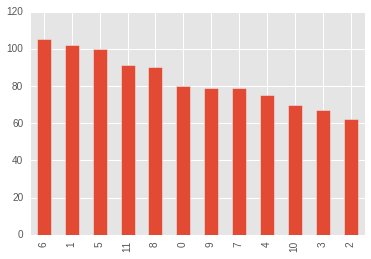

In [16]:
p = df.classes.value_counts().plot(kind='bar')

In [17]:
import itertools

#set up colors per clusters using a dict
colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
colors += [ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')]
colors = itertools.cycle(colors)
class_names = list(set(names))

In [18]:
import mpld3

fig, ax = plt.subplots(figsize=(16,12), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for label in range(len(le.classes_)):
    scatter = ax.scatter(df[df.classes==label]['x2'].values,
                         df[df.classes==label]['y2'].values,
                         c=next(colors),
                         s=240,
                         label=label,
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 12))
    

    labels = list(df[df.classes==label]['tags'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# adding legend
labels = [u"{}: {}".format(i, class_names[i]) for i in range(len(le.classes_))]
mpld3.plugins.connect(fig, mpld3.plugins.InteractiveLegendPlugin(elements, labels))

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 1000 docs projection", size=14) 
mpld3.display() #show the plot

/home/laampt/ds/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [19]:
from IPython.core.display import HTML
def css_styling():
    styles = """<style> .container { width:75% !important; } </style>"""
    return HTML(styles)
css_styling()

## Change tags --> titles

In [20]:
import glob
import codecs

In [26]:
titles = {}
for f in glob.glob("/home/laampt/nlp/xnews/data2/crazy/a1/bm*"):
    prefix = f.split('/')[-1].split('.')[0]
    with codecs.open(f, mode='r', encoding='utf-8') as fin:
        for i, line in enumerate(fin):
            k = "{}_{}".format(prefix,i)
            t = line.split('.')[0][:100]
            titles[k] = t

In [23]:
%reset_selective bm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [24]:
%reset_selective dbow

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [27]:
print titles['bm58_1044']

Phạt Turkish_Airlines wwNUMBERww triệu đồng vì gửi nhầm wwNUMBERww ngàn viên_đạn 


In [28]:
df['titles'] = df.tags.map(titles)

In [29]:
df.head()

,classes,tags,x2,y2,titles
0,5,bm52_719,-14.182017,-40.216112,Nhạc_sĩ Trần_Tiến_Tác giả của những ca_khúc ha...
1,6,bm53_861,2.108787,-9.202131,Nghiên_cứu Não to chưa chắc thông_minh
2,10,bm59_816,18.016133,-12.405259,Người phụ_nữ Sài_Gòn wwDATEww lo chuyện bao_đồng
3,5,bm52_541,-21.805563,-15.663459,Chế Linh hội_ngộ MC Kỳ Duyên tại Pleiku
4,3,bm147_627,-14.253456,-17.088408,Sài_Gòn đẹp ma_mị trong mùa_mưa gió


In [30]:
fig, ax = plt.subplots(figsize=(16,12), subplot_kw=dict(axisbg='#EEEEEE'))

elements = []
for label in range(len(le.classes_)):
    scatter = ax.scatter(df[df.classes==label]['x2'].values,
                         df[df.classes==label]['y2'].values,
                         c=next(colors),
                         s=240,
                         label=label,
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 12))
    

    labels = list(df[df.classes==label]['titles'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# adding legend
labels = [u"{}: {}".format(i, class_names[i]) for i in range(len(le.classes_))]
mpld3.plugins.connect(fig, mpld3.plugins.InteractiveLegendPlugin(elements, labels))

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 1000 docs projection", size=14) 
mpld3.display() #show the plot

## M2: model

In [31]:
from sklearn import cross_validation

In [32]:
skf = cross_validation.StratifiedKFold(y, n_folds=10)
X_train = y_train = []
X_test = y_test = []

for train_index, test_index in skf:
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train = [X[i] for i in train_index]
    X_test  = [X[i] for i in test_index]
    
    y_train = [y[i] for i in train_index]
    y_test  = [y[i] for i in test_index]
    

print len(X_train), len(X_test)
print len(y_train), len(y_test)

('TRAIN:', 16718, 'TEST:', 1864)
('TRAIN:', 16721, 'TEST:', 1861)
('TRAIN:', 16721, 'TEST:', 1861)
('TRAIN:', 16723, 'TEST:', 1859)
('TRAIN:', 16724, 'TEST:', 1858)
('TRAIN:', 16724, 'TEST:', 1858)
('TRAIN:', 16726, 'TEST:', 1856)
('TRAIN:', 16726, 'TEST:', 1856)
('TRAIN:', 16727, 'TEST:', 1855)
('TRAIN:', 16728, 'TEST:', 1854)
16728 1854
16728 1854


In [33]:
feature_names = ["D_{}".format(i) for i in range(100)]
feature_names = np.asarray(feature_names)

In [34]:
import sys
from time import time

In [35]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

# Benchmark classifiers
def benchmark(clf, X_train, y_train, X_test, y_test,le):
    print('-' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.f1_score(y_test, pred)
    print("f1-score:   %0.3f" % score)
    print('-' * 80)
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        print('.' * 80)    
        print("top 10 keywords per class:")
        for i, category in enumerate(le.classes_):
            top10 = np.argsort(clf.coef_[i])[-10:]
            print(trim("%s: %s"
                  % (category, " ".join(feature_names[top10]))))
    print('-' * 80)
    print("classification report:")
    print(metrics.classification_report(y_test, pred,
                                            target_names=le.classes_))
    print('-' * 80)
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [36]:
results = []

In [37]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.utils.extmath import density
from sklearn import metrics

In [ ]:
rc = RidgeClassifier(tol=1e-2, solver="lsqr")
results.append(benchmark(rc, X_train, y_train, X_test, y_test, le))

In [ ]:
pc =  Perceptron(n_iter=50)
results.append(benchmark(pc, X_train, y_train, X_test, y_test, le))

In [ ]:
pa =  PassiveAggressiveClassifier(n_iter=50)
results.append(benchmark(pa, X_train, y_train, X_test, y_test, le))

In [ ]:
kn =KNeighborsClassifier(n_neighbors=10)
results.append(benchmark(kn, X_train, y_train, X_test, y_test, le))

In [ ]:
l1svc = LinearSVC(loss='l2', penalty="l1", dual=False, tol=1e-3)
results.append(benchmark(l1svc, X_train, y_train, X_test, y_test, le))

In [ ]:
l2svc = LinearSVC(loss='l2', penalty="l2", dual=False, tol=1e-3)
results.append(benchmark(l2svc, X_train, y_train, X_test, y_test, le))

In [ ]:
l1sg = SGDClassifier(alpha=.0001, n_iter=50, penalty="l1")
results.append(benchmark(l1sg, X_train, y_train, X_test, y_test, le))

In [ ]:
l2sg = SGDClassifier(alpha=.0001, n_iter=50, penalty="l2")
results.append(benchmark(l2sg, X_train, y_train, X_test, y_test, le))

In [ ]:
esg = SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet")
results.append(benchmark(esg, X_train, y_train, X_test, y_test, le))

In [ ]:
nc = NearestCentroid()
results.append(benchmark(nc, X_train, y_train, X_test, y_test, le))

In [ ]:
bb = BernoulliNB(alpha=.01)
results.append(benchmark(bb, X_train, y_train, X_test, y_test, le))

In [ ]:
class L1LinearSVC(LinearSVC):

    def fit(self, X, y):
        # The smaller C, the stronger the regularization.
        # The more regularization, the more sparsity.
        self.transformer_ = LinearSVC(penalty="l1",
                                      dual=False, tol=1e-3)
        X = self.transformer_.fit_transform(X, y)
        return LinearSVC.fit(self, X, y)

    def predict(self, X):
        X = self.transformer_.transform(X)
        return LinearSVC.predict(self, X)

In [ ]:
myl1svc = L1LinearSVC()
results.append(benchmark(myl1svc, X_train, y_train, X_test, y_test, le))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
results.append(benchmark(lr, X_train, y_train, X_test, y_test, le))

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
results.append(benchmark(rf, X_train, y_train, X_test, y_test, le))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100)
results.append(benchmark(gb, X_train, y_train, X_test, y_test, le))

## Final

In [38]:
ben = pd.read_json("/home/laampt/nlp/xnews/benchmark_14models_d2v100.json")

In [41]:
ben = ben[['models', 'f1scores', 'traintimes', 'testtime']]

In [42]:
ben.columns = [[u'models', u'f1Scores', u'trainTimes', u'testTimes']]

In [44]:
ben.head(n=20)

,models,f1Scores,trainTimes,testTimes
0,RidgeClassifier,0.864055,0.204535,0.001682
1,Perceptron,0.824724,2.139071,0.001639
10,BernoulliNB,0.764287,0.088795,0.006788
11,L1LinearSVC,0.889947,31.881600,0.002168
12,LogisticRegression,0.889445,3.467618,0.001702
13,RandomForestClassifier,0.840341,13.323511,0.084666
14,GradientBoostingClassifier,0.839946,394.787067,0.035133
2,PassiveAggressiveClassifier,0.837506,2.983680,0.001716
3,KNeighborsClassifier,0.880083,0.103822,7.932730
4,LinearSVC,0.889436,26.477657,0.001692


In [43]:
ben.to_json("/home/laampt/nlp/xnews/benchmark_14models_d2v100.json")

In [45]:
results = ben.as_matrix()

In [46]:
print results

[[u'RidgeClassifier' 0.8640551589000001 0.2045350075 0.0016820431]
 [u'Perceptron' 0.8247243126 2.1390709877 0.0016391277]
 [u'BernoulliNB' 0.7642872502 0.08879518510000001 0.006788015400000001]
 [u'L1LinearSVC' 0.8899469154 31.8815999031 0.0021679401]
 [u'LogisticRegression' 0.8894447613 3.4676179886 0.0017020702]
 [u'RandomForestClassifier' 0.8403409228000001 13.3235111237 0.0846660137]
 [u'GradientBoostingClassifier' 0.8399459682 394.7870669365 0.0351331234]
 [u'PassiveAggressiveClassifier' 0.8375055872 2.9836800098
  0.0017158985000000002]
 [u'KNeighborsClassifier' 0.8800828362 0.1038219929 7.9327301979]
 [u'LinearSVC' 0.8894357751 26.4776570797 0.0016920567]
 [u'LinearSVC' 0.8899469154 1.0978899002 0.0017280579000000002]
 [u'SGDClassifier' 0.8622541215 5.0062470436 0.0016639233]
 [u'SGDClassifier' 0.8878182951 2.2326180935 0.0016908646]
 [u'SGDClassifier' 0.8912610247 6.0422041416 0.0017349720000000002]
 [u'NearestCentroid' 0.8393979177 0.030662059800000002 0.0044798851]]


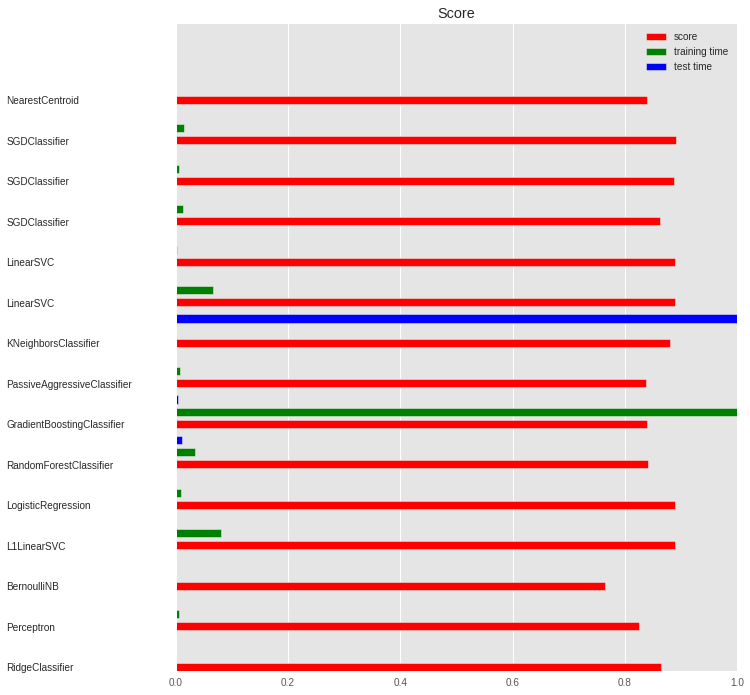

In [47]:
# make some plots

indices = np.arange(len(results))

results2 = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results2
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 10))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='r')
plt.barh(indices + .3, training_time, .2, label="training time", color='g')
plt.barh(indices + .6, test_time, .2, label="test time", color='b')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

In [ ]:
# ben = pd.DataFrame(dict(models=results2[0],f1scores=results2[1],traintimes=results2[2],testtime=results2[3]))

## Okay, I love logistic and sgd/linearsvc so much: good, fast, reliable

In [48]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_[0].ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features*2), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

In [49]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

In [52]:
lr = LogisticRegression(C=1, class_weight='auto' )
lr.fit(X_train, y_train)
print metrics.classification_report(y_test, lr.predict(X_test))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93       172
          1       0.93      0.92      0.93       197
          2       0.90      0.94      0.92        96
          3       0.87      0.85      0.86       127
          4       0.84      0.89      0.86       122
          5       0.91      0.86      0.88       194
          6       0.84      0.83      0.83       165
          7       0.81      0.81      0.81       172
          8       0.97      0.98      0.97       152
          9       0.94      0.90      0.92       164
         10       0.83      0.92      0.87       107
         11       0.86      0.86      0.86       186

avg / total       0.89      0.89      0.89      1854



In [59]:
esg = SGDClassifier(penalty="l2", class_weight='auto', n_iter=100, n_jobs=4)
esg.fit(X_train, y_train)
print metrics.classification_report(y_test, esg.predict(X_test))

             precision    recall  f1-score   support

          0       0.93      0.92      0.93       172
          1       0.92      0.91      0.92       197
          2       0.86      0.94      0.90        96
          3       0.87      0.86      0.87       127
          4       0.86      0.89      0.88       122
          5       0.90      0.89      0.89       194
          6       0.84      0.83      0.84       165
          7       0.81      0.80      0.80       172
          8       0.99      0.97      0.98       152
          9       0.94      0.89      0.91       164
         10       0.80      0.93      0.86       107
         11       0.88      0.84      0.86       186

avg / total       0.89      0.89      0.89      1854



In [60]:
svc = LinearSVC(C=10, dual=False, class_weight='auto')
svc.fit(X_train, y_train)
print metrics.classification_report(y_test, svc.predict(X_test))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       172
          1       0.94      0.92      0.93       197
          2       0.91      0.94      0.92        96
          3       0.87      0.86      0.87       127
          4       0.84      0.89      0.86       122
          5       0.91      0.86      0.89       194
          6       0.83      0.82      0.83       165
          7       0.81      0.81      0.81       172
          8       0.97      0.98      0.97       152
          9       0.94      0.90      0.92       164
         10       0.83      0.92      0.87       107
         11       0.87      0.87      0.87       186

avg / total       0.89      0.89      0.89      1854



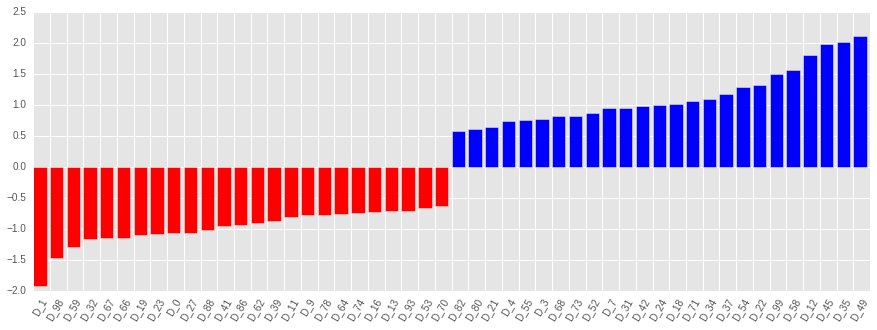

In [61]:
visualize_coefficients(lr, feature_names)

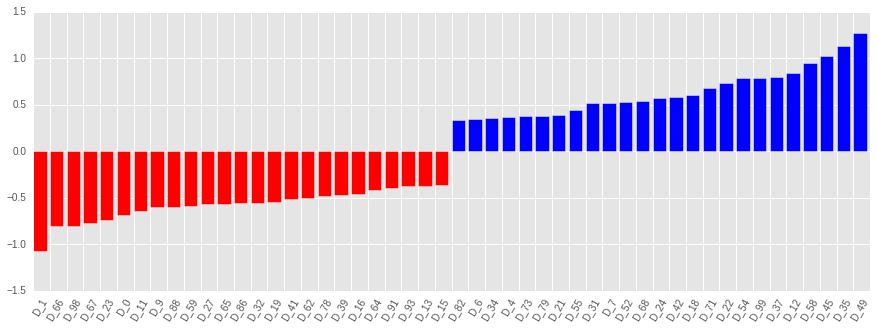

In [62]:
visualize_coefficients(esg, feature_names)

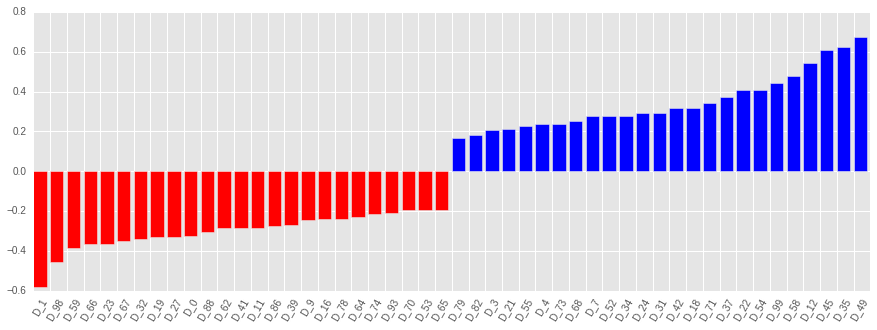

In [63]:
visualize_coefficients(svc, feature_names)

## Benchmark

In [66]:
benchmark(LogisticRegression(C=1, class_weight='auto'), X_train, y_train, X_test, y_test,le)

--------------------------------------------------------------------------------
Training: 
LogisticRegression(C=1, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
train time: 3.431s
test time:  0.002s
f1-score:   0.887
--------------------------------------------------------------------------------
dimensionality: 100
density: 1.000000
................................................................................
top 10 keywords per class:
bm119: D_34 D_37 D_54 D_22 D_99 D_58 D_12 D_45 D_35 D_49
bm121: D_14 D_49 D_61 D_42 D_45 D_89 D_43 D_17 D_80 D_66
bm145: D_76 D_3 D_40 D_35 D_32 D_43 D_36 D_5 D_34 D_84
bm147: D_60 D_77 D_80 D_20 D_32 D_88 D_29 D_22 D_12 D_62
bm45: D_65 D_7 D_5 D_42 D_12 D_56 D_77 D_38 D_0 D_61
bm52: D_71 D_99 D_13 D_65 D_34 D_51 D_25 D_80 D_42 D_40
bm53: D_39 D_43 D_35 D_63 D_4 D_66 D_56 D_99 D_5 D_34

/home/laampt/ds/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


('LogisticRegression',
 0.88725661723401139,
 3.430788993835449,
 0.0016608238220214844)

In [67]:
benchmark(SGDClassifier(penalty='l2', n_iter=100, class_weight='auto'), X_train, y_train, X_test, y_test,le)

--------------------------------------------------------------------------------
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=100, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 4.406s
test time:  0.002s
f1-score:   0.886
--------------------------------------------------------------------------------
dimensionality: 100
density: 1.000000
................................................................................
top 10 keywords per class:
bm119: D_22 D_71 D_99 D_54 D_37 D_12 D_45 D_58 D_35 D_49
bm121: D_47 D_49 D_61 D_42 D_45 D_43 D_17 D_89 D_80 D_66
bm145: D_76 D_22 D_40 D_35 D_5 D_36 D_43 D_34 D_32 D_84
bm147: D_57 D_33 D_77 D_88 D_32 D_20 D_22 D_29 D_12 D_62
bm45: D_12 D_73 D_80 D_59 D_42 D_56 D_38 D_77 D_0 D_61
bm52: D_91 D_13 D_99 D_34 D_65 D_51 D_40 D_

/home/laampt/ds/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


('SGDClassifier',
 0.88623120629688823,
 4.406296968460083,
 0.0016629695892333984)

In [69]:
benchmark(LinearSVC(C=10, dual=False, class_weight='auto'), X_train, y_train, X_test, y_test,le)

--------------------------------------------------------------------------------
Training: 
LinearSVC(C=10, class_weight='auto', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
train time: 1.184s
test time:  0.002s
f1-score:   0.889
--------------------------------------------------------------------------------
dimensionality: 100
density: 1.000000
................................................................................
top 10 keywords per class:
bm119: D_71 D_37 D_22 D_54 D_99 D_58 D_12 D_45 D_35 D_49
bm121: D_49 D_47 D_61 D_89 D_43 D_17 D_45 D_42 D_80 D_66
bm145: D_40 D_12 D_35 D_3 D_32 D_43 D_36 D_5 D_34 D_84
bm147: D_80 D_36 D_77 D_32 D_20 D_88 D_29 D_22 D_12 D_62
bm45: D_80 D_7 D_5 D_12 D_42 D_56 D_38 D_77 D_0 D_61
bm52: D_91 D_13 D_99 D_65 D_51 D_34 D_40 D_25 D_42 D_80
bm53: D_39 D_43 D_35 D_66 D_63 D_4 D_56 D_99 D_5 D_34
bm54: D_0 D_89 D_78

/home/laampt/ds/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


('LinearSVC', 0.88891221112526486, 1.183548927307129, 0.0016529560089111328)

## Export

In [64]:
from sklearn.externals import joblib

In [65]:
joblib.dump(le, "/home/laampt/nlp/xnews/snews/b01/label_encoder.pkl")
joblib.dump(lr, "/home/laampt/nlp/xnews/snews/b01/lr.pkl")
joblib.dump(esg, "/home/laampt/nlp/xnews/snews/b01/esg.pkl")
joblib.dump(svc, "/home/laampt/nlp/xnews/snews/b01/svc.pkl")

['/home/laampt/nlp/xnews/snews/b01/svc.pkl',
 '/home/laampt/nlp/xnews/snews/b01/svc.pkl_01.npy',
 '/home/laampt/nlp/xnews/snews/b01/svc.pkl_02.npy',
 '/home/laampt/nlp/xnews/snews/b01/svc.pkl_03.npy']

## Gridsearch for LR, SVC, GBC

In [ ]:
for c in 10. ** np.arange(-5, 5):
    print "C: {}".format(c)
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print metrics.classification_report(y_test, lr.predict(X_test))

In [ ]:
for c in 10. ** np.arange(-5, 5):
    print "C: {}".format(c)
    lr = LogisticRegression(C=c, class_weight='auto')
    lr.fit(X_train, y_train)
    print metrics.classification_report(y_test, lr.predict(X_test))

In [ ]:
for c in 10. ** np.arange(-3, 5):
    print "C: {}".format(c)
    svc = LinearSVC(C=c, class_weight='auto')
    svc.fit(X_train, y_train)
    print metrics.classification_report(y_test, svc.predict(X_test))

In [ ]:
from sklearn.svm import SVC

In [ ]:
for c in 10. ** np.arange(-3, 5):
    print "C: {}".format(c)
    svc = SVC(C=c, gamma=0.01, class_weight='auto')
    svc.fit(X_train, y_train)
    print metrics.classification_report(y_test, svc.predict(X_test))

In [ ]:
for n in [100,200,500,1000]:
    print "N: {}".format(n)
    gbc = GradientBoostingClassifier(n_estimators=int(n), verbose=3)
    gbc.fit(X_train, y_train)
    print metrics.classification_report(y_test, gbc.predict(X_test))

## Sanity check

In [83]:
doc = u"ba sản_phẩm được tích_hợp để thực_hiện một chuỗi các quá_trình phân_tích một đoạn văn_bản tiếng Việt"
vec = dbow.infer_vector(doc.split())
print le.inverse_transform(lr.predict([vec]))
print le.inverse_transform(esg.predict([vec]))
print le.inverse_transform(svc.predict([vec]))

['bm53']
['bm53']
['bm53']


In [84]:
for d,v in dbow.docvecs.most_similar([vec]):
    print d, v

sggp_79292 0.582717359066
baonamdinh_5050 0.573519527912
tuoitre_19667 0.572922825813
tuoitre_15525 0.569645166397
sggp_79354 0.565468430519
baonamdinh_3638 0.564980506897
tuoitre_8025 0.556860685349
baonamdinh_9604 0.556052267551
bm147_1257 0.554287910461
genk_43844 0.551550805569


In [85]:
%reset_selective dbow

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
